In [1]:
!pip install numpy

In [2]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1286,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN
1926,ham,Dont give a monkeys wot they think and i certa...,NaN,NaN,NaN
3524,ham,I not free today i haf 2 pick my parents up to...,NaN,NaN,NaN
4138,ham,Ever green quote ever told by Jerry in cartoon...,NaN,NaN,NaN
1050,ham,Are you available for soiree on June 3rd?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# data cleaning
# EDA
# text preprocessing
# model building
# evaluation


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [9]:
df.sample(5)

,v1,v2
3638,ham,Wat's da model num of ur phone?
1238,ham,"Dear relieved of westonzoyland, all going to p..."
3702,ham,How is my boy? No sweet words left for me this...
3581,ham,You are right. Meanwhile how's project twins c...
461,ham,Great. Never been better. Each day gives even ...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1864,ham,You call him now ok i said call him
196,ham,Did u got that persons story
824,ham,Have a good evening! Ttyl
5495,ham,"Good afternoon, my love ... How goes your day ..."
1140,ham,Oh:)as usual vijay film or its different?


In [11]:
!pip install scikit-learn

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# removing missing values
df.isnull().sum()

,0
target,0
text,0


In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

In [ ]:
#EDA - exploratory data analysis

In [19]:
df['target'].value_counts()

,count
target,
0,4516
1,653


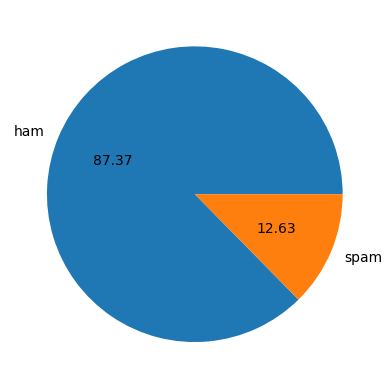

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
df.columns

Index(['target', 'text'], dtype='object')

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200426,18.456761,1.966531
std,58.387001,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.123782,1.820195
std,56.405390,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

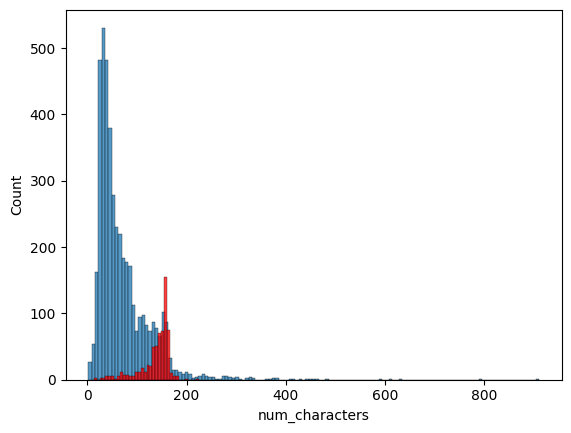

In [33]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

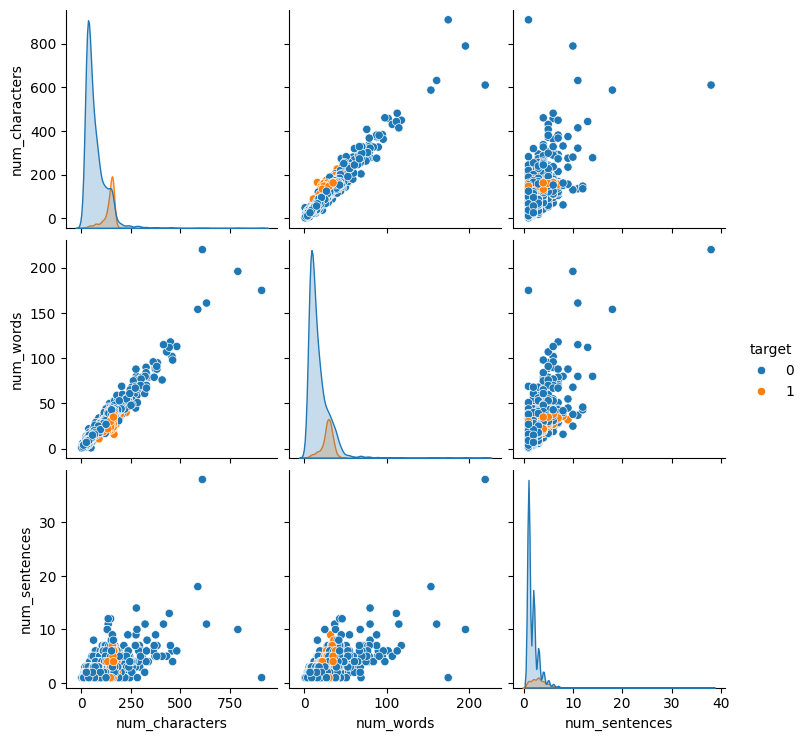

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

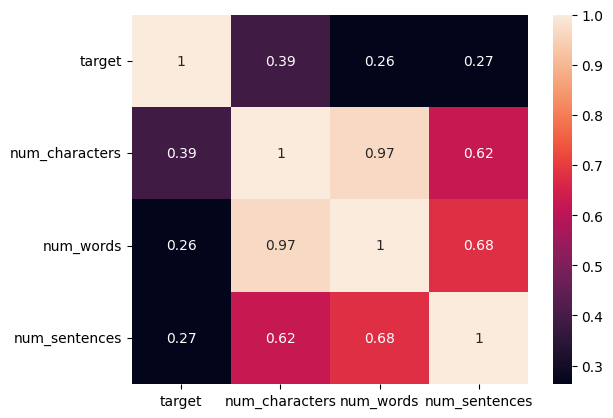

In [35]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [36]:
import string

# data pre-processing


In [37]:
# lowercase
# tokenize
# remove special character like , . ! $
# stopword removal
# punctuation
# stemming

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

transform(text)------> apply above methods -----> clean data

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this it")

'gon na home soon want talk'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
import wordcloud

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
span_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

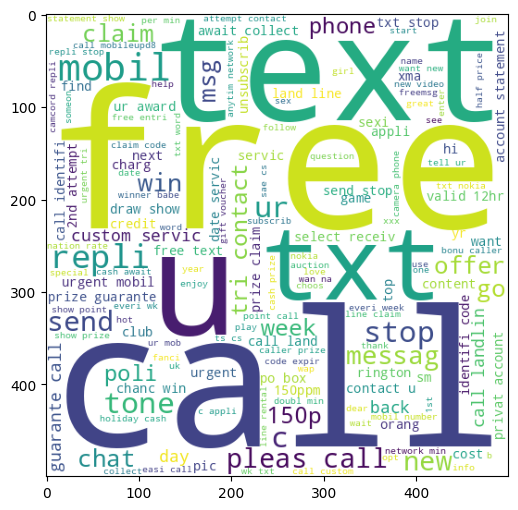

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

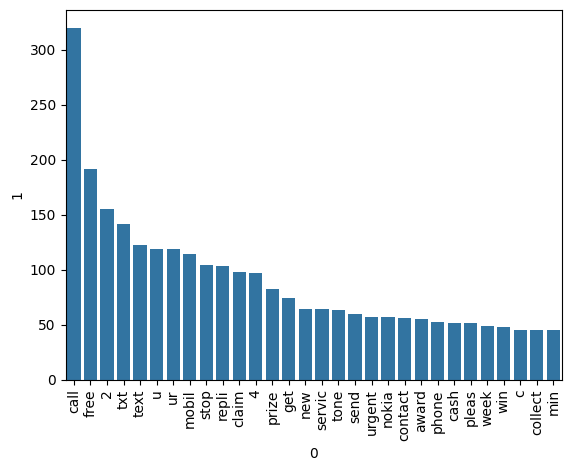

In [49]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

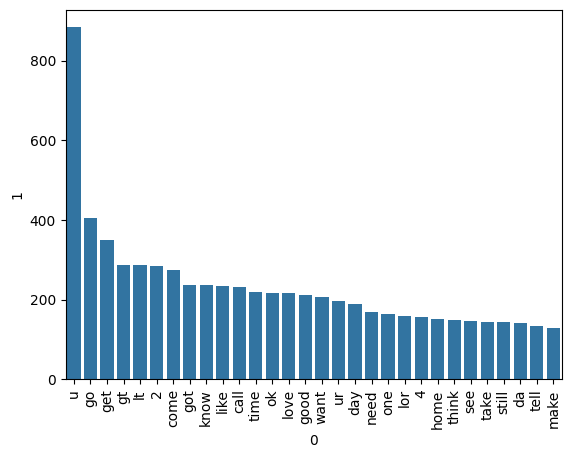

In [51]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# model training


In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
y = df['target'].values

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel='poly')

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
dtc.fit(X_train,y_train)
y_pred4 = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9294003868471954
[[880  16]
 [ 57  81]]
0.8350515463917526


In [63]:
svc.fit(X_train,y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.925531914893617
[[896   0]
 [ 77  61]]
1.0


In [65]:
import pickle

In [66]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))